In [16]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
df = pd.read_csv('norm_data.tsv', sep = '\t')
df

,Unnamed: 0,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,SRR1782693,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,0,5.064846e-05,1.390220e-05,0.000086,4.830331e-05,2.264291e-05,5.634691e-05,5.001545e-05,5.633922e-05,7.515083e-05,...,6.160122e-05,3.568170e-05,4.330241e-05,5.397875e-05,7.586702e-05,0.000078,3.859068e-05,5.708651e-05,8.075028e-05,5.118729e-05
1,1,7.559472e-07,0.000000e+00,0.000001,0.000000e+00,0.000000e+00,7.087662e-07,1.069849e-06,0.000000e+00,2.994057e-07,...,7.228305e-07,2.885313e-07,0.000000e+00,2.578603e-07,7.848312e-07,0.000000,1.628299e-07,0.000000e+00,6.117446e-07,0.000000e+00
2,2,2.570220e-05,2.585549e-05,0.000031,2.320247e-05,3.402981e-05,3.437516e-05,2.888593e-05,3.082236e-05,3.473106e-05,...,3.059982e-05,3.202697e-05,3.007112e-05,3.231849e-05,3.073922e-05,0.000030,3.489987e-05,2.801088e-05,3.476748e-05,3.348596e-05
3,3,1.565891e-05,1.390220e-05,0.000016,1.750731e-05,2.002523e-05,1.346656e-05,2.353668e-05,1.717967e-05,2.095840e-05,...,2.120303e-05,2.115896e-05,2.135049e-05,1.839403e-05,2.014400e-05,0.000012,1.915965e-05,1.703586e-05,1.570144e-05,1.420616e-05
4,4,3.779736e-06,5.586865e-06,0.000002,4.113164e-06,4.842703e-06,6.378896e-06,6.686557e-06,5.305487e-06,3.592868e-06,...,6.746418e-06,5.578271e-06,5.713512e-06,4.813392e-06,7.717507e-06,0.000004,6.187535e-06,4.586577e-06,3.364595e-06,2.705936e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,65212,0.000000e+00,1.299271e-07,0.000000,6.327945e-07,1.308839e-07,0.000000e+00,5.349246e-07,0.000000e+00,2.994057e-07,...,1.606290e-07,0.000000e+00,1.503556e-07,0.000000e+00,2.616104e-07,0.000000,1.628299e-07,0.000000e+00,2.039149e-07,1.127473e-07
65213,65213,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65214,65214,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65215,65215,0.000000e+00,0.000000e+00,0.000000,1.054658e-07,0.000000e+00,0.000000e+00,2.674623e-07,2.526423e-07,2.994057e-07,...,8.031450e-08,9.617709e-08,0.000000e+00,1.719069e-07,1.308052e-07,0.000000,5.427662e-08,8.190317e-08,0.000000e+00,0.000000e+00


In [18]:
# Define distance metric
def kl_divergence(p, q):
    return np.sum(np.where(np.any(p!= 0) and np.any(q!=0), p * np.log(p / q), 0))

In [19]:
#Convert the dataframe to a Numpy array
expression_vals = df.to_numpy()

In [20]:
#Get a List of the Samples
samples = df.columns[1:]
samples

Index(['SRR1782685', 'SRR1782686', 'SRR1782687', 'SRR1782688', 'SRR1782689',
       'SRR1782690', 'SRR1782691', 'SRR1782692', 'SRR1782693', 'SRR1782694',
       ...
       'SRR1782997', 'SRR1782998', 'SRR1782999', 'SRR1783000', 'SRR1783001',
       'SRR1783002', 'SRR1783003', 'SRR1783004', 'SRR1783005', 'SRR1783006'],
      dtype='object', length=322)

In [21]:
#get the outputs and the indices of samples that are crohns or colitis
f = open('classifications.txt', 'r').read()
samples_to_label = eval(f)
print(len(samples_to_label))

crohns = []
colitis = []
for ind in range(len(samples)):
    classification = samples_to_label[samples[ind]]
    if classification == 0:
        crohns.append(ind)
    elif classification == 1:
        colitis.append(ind)
        
    
print(crohns)

322
[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 36, 39, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 65, 67, 68, 69, 70, 72, 73, 74, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 235, 236, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 275, 277, 278, 280, 284, 285, 286, 288, 292, 295, 298, 299, 302, 303, 306, 308, 309, 310, 311, 3

In [22]:
#need to filter out genes that are not expressed a lot
gene_inds_to_keep = []
print(expression_vals.shape)
for ind in range(expression_vals.shape[0]):
    gene_expr = expression_vals[ind]
    crohns_mean = np.array([gene_expr[i] for i in crohns]).mean()
    crohns_var = np.array([gene_expr[i] for i in crohns]).var()
    colitis_mean = np.array([gene_expr[i] for i in colitis]).mean()
    colitis_var = np.array([gene_expr[i] for i in colitis]).var()
    Z = (crohns_mean - colitis_mean) / np.sqrt(crohns_var/len(crohns) + colitis_var/len(colitis))
    if abs(Z) > 1.00231:
        gene_inds_to_keep.append(ind)
len(gene_inds_to_keep)

(65217, 323)


82

In [14]:
#try with euclidean first just to see if we can get linkage func to work
euclid_clusters = linkage(expression_vals[gene_inds_to_keep,:], metric = 'euclidean')

In [23]:
kl_clusters = linkage(expression_vals, metric = kl_divergence)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [ ]:
euclid_cluster_nums = fcluster(euclid_clusters, t = 0.99)
print(pd.Series(euclid_cluster_nums).value_counts())
print(len(set(euclid_cluster_nums)))
#for t = 0.99, 5024 clusters
#for t = 0.9, 5396 clusters
#for t = 0.9, 5824 clusters
#for t = 0.8, 6693 clusters

In [24]:
f = open("geneNames.txt", "r")
lines = f.readlines()
clusters = []
lines = [lines[ind].strip() for ind in gene_inds_to_keep]
for ind in range(len(lines)):
    gene = lines[ind]
    clusters.append(gene)
    #cluster = euclid_cluster_nums[ind]
    #clusters.setdefault(cluster, set()).add(gene)

In [25]:
f = open("clusters.txt","w")
f.write(str(clusters))
f.close()

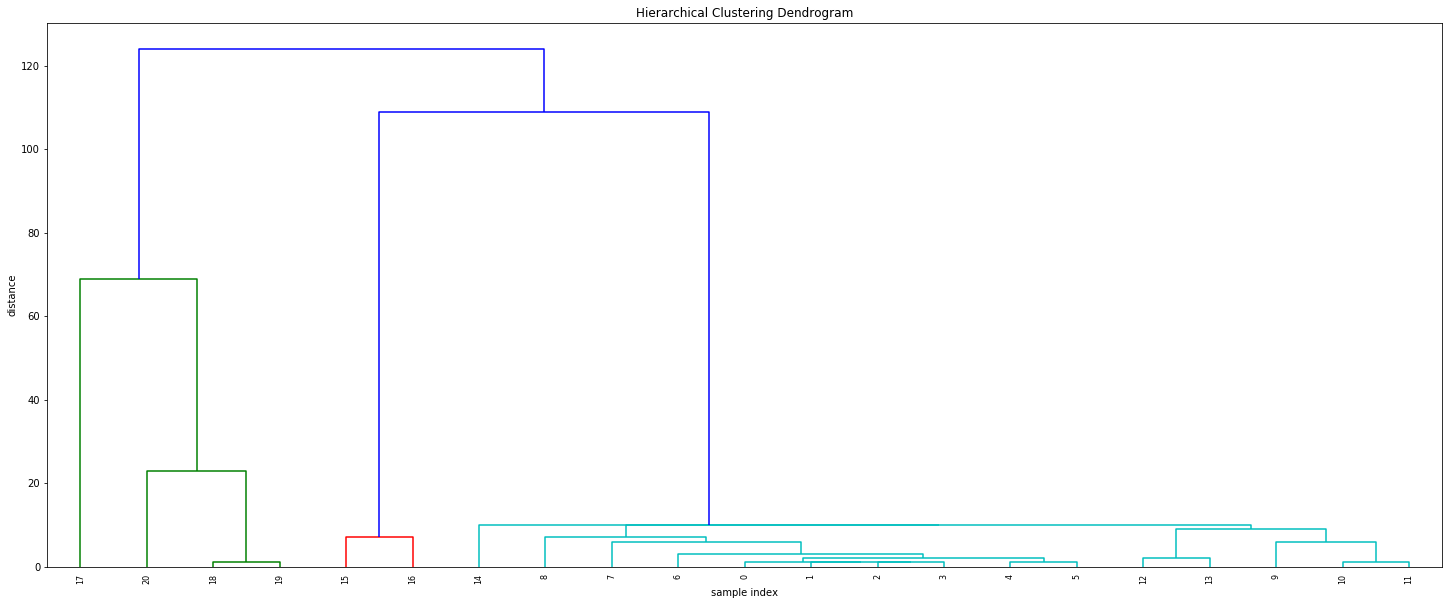

In [34]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    euclid_clusters,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()